<a href="https://colab.research.google.com/github/Surajit96-lang/Codex_Techno_-/blob/main/codextechno2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt # import all libraries for Analyze the data
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
uploaded=files.upload()


Saving ifood_df.csv to ifood_df.csv


In [ ]:
data=pd.read_csv('ifood_df.csv')
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [ ]:
data.describe()
data.isnull().sum()

,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


Descriptive stats

In [ ]:
AVERAGE = {
    "Avg_Income": data["Income"].mean(),
    "Median_Income": data["Income"].median(),
    "Avg_Age": data["Age"].mean(),
    "Kids_Avg": data["Kidhome"].mean(),
    "Teens_Avg": data["Teenhome"].mean(),
    "Marital_Distribution": data[["marital_Divorced","marital_Married","marital_Single","marital_Together","marital_Widow"]].mean(),
    "Education_Distribution": data[["education_2n Cycle","education_Basic","education_Graduation","education_Master","education_PhD"]].mean()
}
print(AVERAGE)

{'Avg_Income': np.float64(51622.0947845805), 'Median_Income': 51287.0, 'Avg_Age': np.float64(51.09569160997732), 'Kids_Avg': np.float64(0.4421768707482993), 'Teens_Avg': np.float64(0.5065759637188209), 'Marital_Distribution': marital_Divorced    0.104308
marital_Married     0.387302
marital_Single      0.216327
marital_Together    0.257596
marital_Widow       0.034467
dtype: float64, 'Education_Distribution': education_2n Cycle      0.089796
education_Basic         0.024490
education_Graduation    0.504762
education_Master        0.165079
education_PhD           0.215873
dtype: float64}


purchase value

In [ ]:
purchase = {
    "Avg_Wine_Spend": data["MntWines"].mean(),
    "Avg_Fruit_Spend": data["MntFruits"].mean(),
    "Avg_Meat_Spend": data["MntMeatProducts"].mean(),
    "Avg_Fish_Spend": data["MntFishProducts"].mean(),
    "Avg_Sweet_Spend": data["MntSweetProducts"].mean(),
    "Avg_Gold_Spend": data["MntGoldProds"].mean(),
    "Avg_Total_Spend": data["MntTotal"].mean()
}
print(purchase)

{'Avg_Wine_Spend': np.float64(306.16462585034014), 'Avg_Fruit_Spend': np.float64(26.4031746031746), 'Avg_Meat_Spend': np.float64(165.31201814058957), 'Avg_Fish_Spend': np.float64(37.756462585034015), 'Avg_Sweet_Spend': np.float64(27.128344671201813), 'Avg_Gold_Spend': np.float64(44.05714285714286), 'Avg_Total_Spend': np.float64(562.7646258503402)}


frequency of purchase

In [ ]:
# Calculate total purchases per customer
data["TotalPurchases"] = data["NumWebPurchases"] + data["NumCatalogPurchases"] + data["NumStorePurchases"]

# Purchase frequency = total purchases per day
data["PurchaseFrequency"] = data["TotalPurchases"] / data["Customer_Days"]

# Overall average frequency across all customers
avg_frequency = data["PurchaseFrequency"].mean()

print("Average Purchase Frequency:", avg_frequency)


Average Purchase Frequency: 0.004997542155059233


In [ ]:
column=data.columns
print(column)

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')


In [ ]:
#Select only specified columns
data_selected = data[column]

#Get descriptive statistics
descriptive_stats = data_selected.describe(include='all')

#Show the output as a table
print(descriptive_stats)

              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.000000      2205.000000       2205.000000   
mean     26.403175       165.312018        37.756463         27.128345   
std      39.784484       217.784507        54.824635         41.130468   
min       0.000000 

In [ ]:
# Example: data is your customer dataframe
features = [
    'Recency',
    'Income',
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases',
    'Age', 'Kidhome', 'Teenhome'
]

X = data[features]


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # X = selected features


k=2, Silhouette Score=0.311
k=3, Silhouette Score=0.246
k=4, Silhouette Score=0.225
k=5, Silhouette Score=0.163
k=6, Silhouette Score=0.162
k=7, Silhouette Score=0.162
k=8, Silhouette Score=0.165
k=9, Silhouette Score=0.165


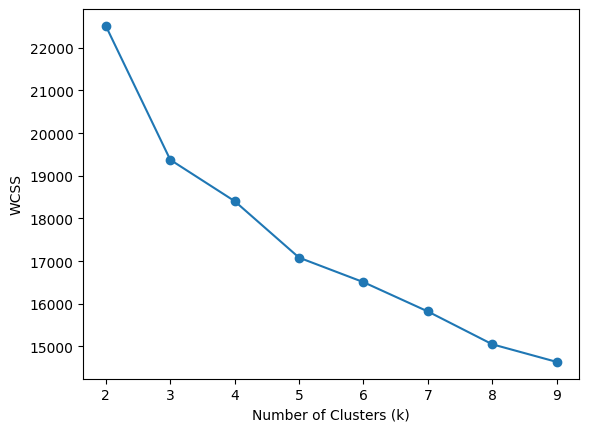

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

wcss = [] # WCSS - Within-Cluster Sum of Squares
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    print(f"k={k}, Silhouette Score={silhouette_score(X_scaled, kmeans.labels_):.3f}")

plt.plot(range(2,10), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels back to dataset
data['Cluster'] = clusters


               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        73827.455830  0.060071  0.257951  48.067138  504.261484  99.035336   
1        33703.373089  0.807339  0.420999  49.215087   37.612640   4.895005   
2        56778.411360  0.253012  0.982788  48.314974  417.089501  18.652324   
3        74673.008333  0.052778  0.166667  50.308333  703.222222  40.425000   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0             419.424028       133.823322        100.190813     94.098940   
1              22.138634         6.936799          5.038736     15.057085   
2             117.631670        25.036145         19.419966     56.936317   
3             432.650000        66.750000         42.327778     62.958333   

         ...  marital_Together  marital_Widow  education_2n Cy

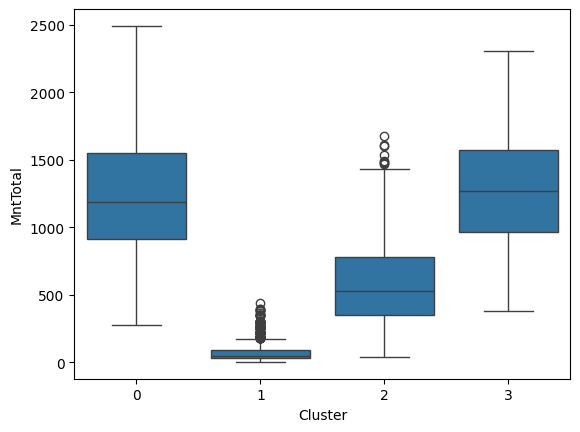

In [ ]:
cluster_profile = data.groupby('Cluster').mean()
print(cluster_profile)

sns.boxplot(x="Cluster", y="MntTotal", data=data)
plt.show()


VISUALIZATION

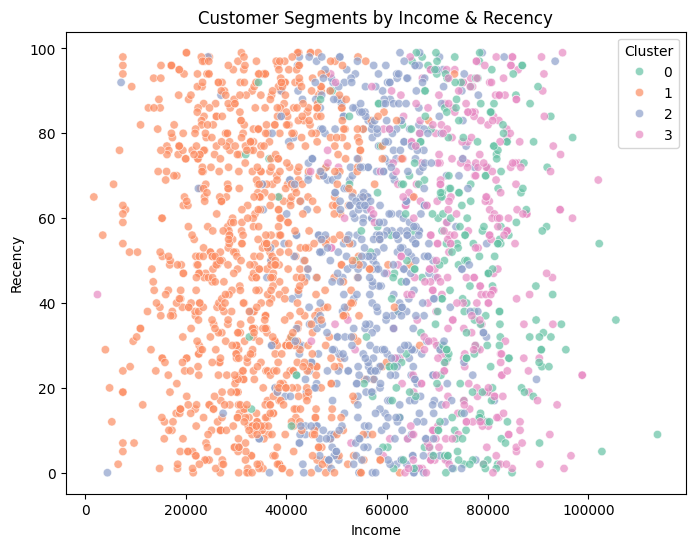

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='Income',y='Recency',hue='Cluster', palette='Set2', alpha=0.7)
plt.title("Customer Segments by Income & Recency")
plt.show()


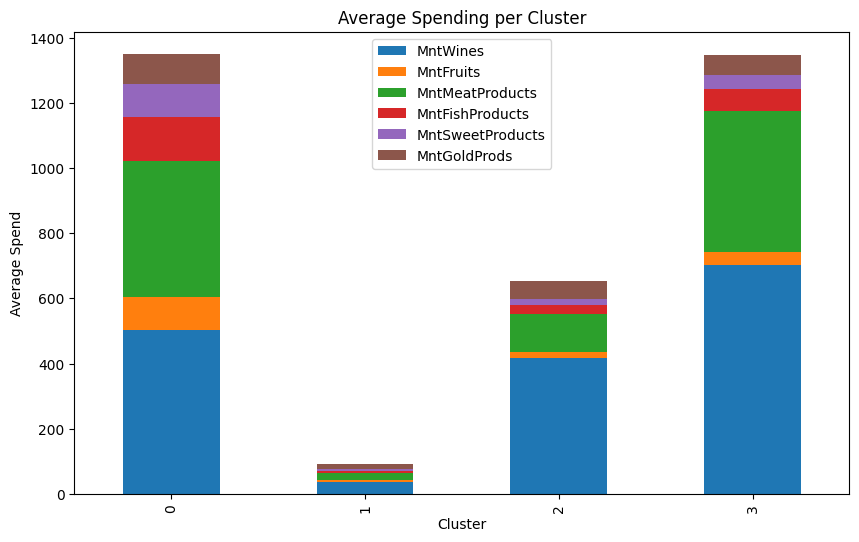

In [ ]:
spending = ['MntWines', 'MntFruits', 'MntMeatProducts',
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

cluster_profile = data.groupby('Cluster')[spending].mean().reset_index()

cluster_profile.plot(
    x='Cluster',
    kind='bar',
    figsize=(10,6),
    stacked=True
)
plt.title("Average Spending per Cluster")
plt.ylabel("Average Spend")
plt.show()


/tmp/ipython-input-3961913970.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Income', data=data, palette='Set2')


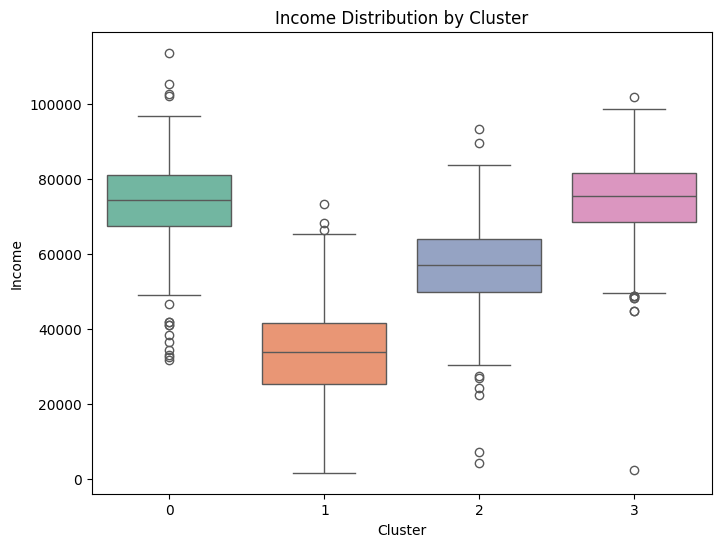

/tmp/ipython-input-3961913970.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Age', data=data, palette='Set3')


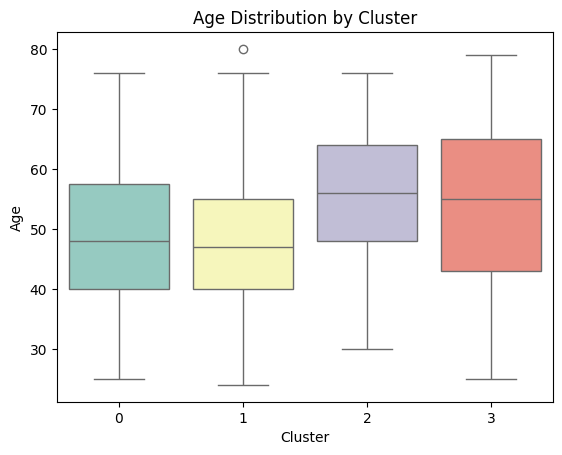

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Cluster', y='Income', data=data, palette='Set2')
plt.title("Income Distribution by Cluster")
plt.show()

sns.boxplot(x='Cluster', y='Age', data=data, palette='Set3')
plt.title("Age Distribution by Cluster")
plt.show()


In [ ]:
cluster_profile = data.groupby('Cluster').mean()[[
    'Recency', 'Income',
    'MntWines','MntMeatProducts','MntFruits','MntSweetProducts','MntGoldProds',
    'NumWebPurchases','NumCatalogPurchases','NumStorePurchases',
    'Age'
]]
print(cluster_profile)


           Recency        Income    MntWines  MntMeatProducts  MntFruits  \
Cluster                                                                    
0        48.067138  73827.455830  504.261484       419.424028  99.035336   
1        49.215087  33703.373089   37.612640        22.138634   4.895005   
2        48.314974  56778.411360  417.089501       117.631670  18.652324   
3        50.308333  74673.008333  703.222222       432.650000  40.425000   

         MntSweetProducts  MntGoldProds  NumWebPurchases  NumCatalogPurchases  \
Cluster                                                                         
0              100.190813     94.098940         5.639576             5.402827   
1                5.038736     15.057085         2.053007             0.521916   
2               19.419966     56.936317         6.037866             2.752151   
3               42.327778     62.958333         5.344444             6.091667   

         NumStorePurchases        Age  
Cluster         